# サポートベクターマシンの分類

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print('sklearn version : ' + sklearn.__version__)

sklearn version : 0.24.0


# 線形サポートベクターマシンとロジスティック回帰モデル

2つのモデルはL2正規化を用いて分類を行う。

c:\users\naolu\documents\github\sklearn_tutorials\.venv\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
c:\users\naolu\documents\github\sklearn_tutorials\.venv\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


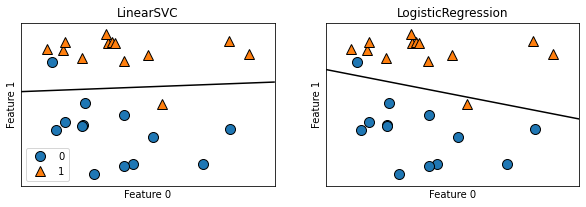

In [2]:
import mglearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

2つのモデルにはパラメータCがある。  
Cが大きくなれば正規化が弱くなり、個々のデータを正確にクラス分類を行うようになる。  
Cが小さい場合は1つ1つのデータではなく、大多数の分類を行うようになる。

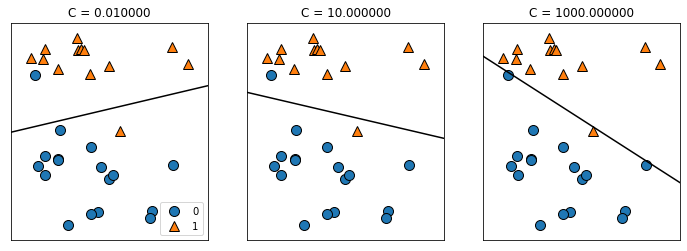

In [3]:
mglearn.plots.plot_linear_svc_regularization()

# 2項分類を用いた多項分類

多項分類場合、複数の2項分類を組み合わせることで行うことができる。  
1つの項目かその他の項目を2項分類し、そのスコアが一番高いものが勝ちになる。

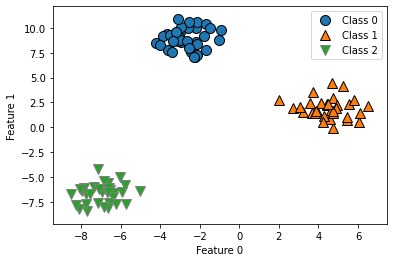

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

## 線形サポートベクターマシンモデルの学習

In [5]:
lsvm = LinearSVC().fit(X, y)

In [6]:
lsvm.coef_.shape

(3, 2)

In [7]:
lsvm.intercept_.shape

(3,)

## 予測結果の表示

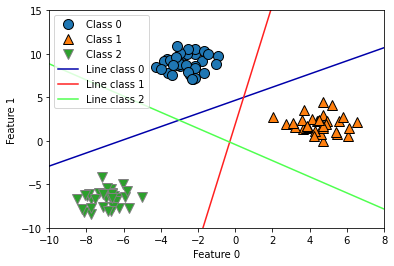

In [8]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(lsvm.coef_, lsvm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'])

Text(0, 0.5, 'Feature 1')

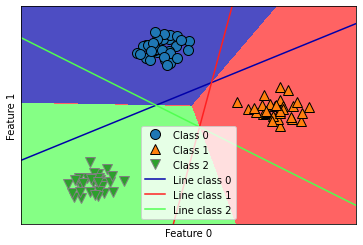

In [9]:
mglearn.plots.plot_2d_classification(lsvm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(lsvm.coef_, lsvm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# カーネル法を用いたサポートベクターマシン

線形サポートベクターマシンは線形モデルのため下記のような訓練セットを学習することは難しい。  
そのためカーネル法を用いたサポートベクターマシンを用いる。  
一般的にSVMはこのモデルのことを指す。

Text(0, 0.5, 'Feature 1')

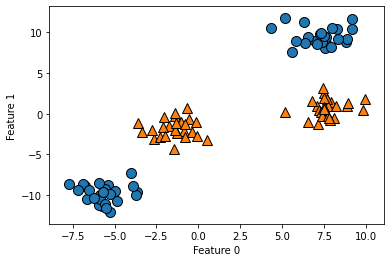

In [14]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2#ここはサンプルのため、線形モデルでは学習しにくいデータセット攻勢に変える

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

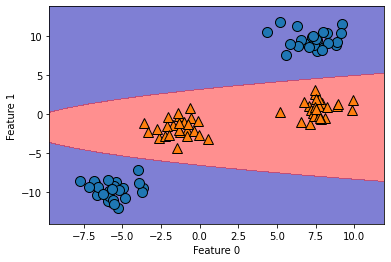

In [34]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

パラメータは下記2つある。  
- gamma: ガウシアンカーネルの幅の調整。  
gammaが大きい場合、個々のデータを重視するようになり、よりモデルが複雑になる。
- C: 正規化パラメータ  
Cが大きい場合、個々のデータを重視するようになり、よりモデルが複雑になる。

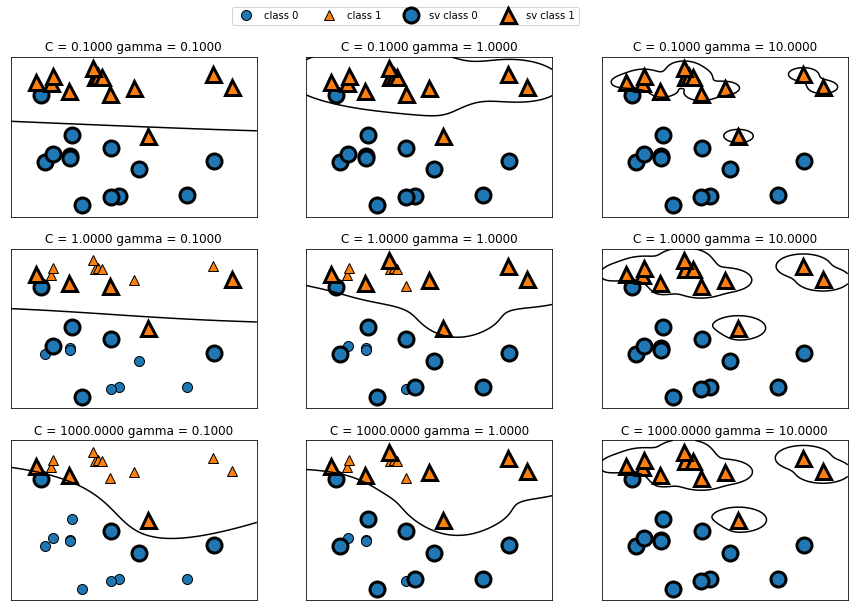

In [35]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol=4, loc=(.9, 1.2))

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [40]:
svc.score(X_train, y_train)

0.903755868544601

In [41]:
svc.score(X_test, y_test)

0.9370629370629371

Text(0, 0.5, 'Feature magnitude')

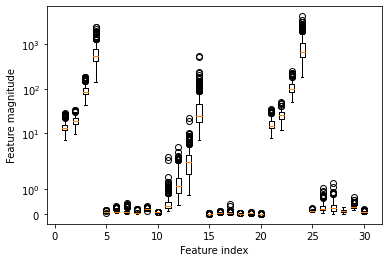

In [42]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")